In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and doing an initial exploration of the file by looking at the head rows
df = pd.read_csv('death2014.csv')
df.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country or Area,Year,Area,Sex,Age,Cause of death (WHO),Record Type,Reliability,Source Year,Value,Value Footnotes
0,Australia,2014,Total,Male,Total,"Certain infectious and parasitic diseases, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,1411.0,NaN
1,Australia,2014,Total,Male,Total,"Intestinal infectious diseases, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,116.0,NaN
2,Australia,2014,Total,Male,Total,"Tuberculosis, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,29.0,NaN
3,Australia,2014,Total,Male,Total,"Tetanus, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
4,Australia,2014,Total,Male,Total,"Diphtheria, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN


In [242]:
# Cleansing file to filter out rows that represent subtotals and would result in "double counting"
df = df[(df["Cause of death (WHO)"] != 'All causes, ICD10') & (df['Age'] != 'Total')]

df

,Country or Area,Year,Area,Sex,Age,Cause of death (WHO),Record Type,Reliability,Source Year,Value,Value Footnotes
63,Australia,2014,Total,Male,0,"Certain infectious and parasitic diseases, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,7.0,NaN
64,Australia,2014,Total,Male,0,"Intestinal infectious diseases, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
65,Australia,2014,Total,Male,0,"Tuberculosis, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
66,Australia,2014,Total,Male,0,"Tetanus, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
67,Australia,2014,Total,Male,0,"Diphtheria, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
68,Australia,2014,Total,Male,0,"Whooping cough, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
69,Australia,2014,Total,Male,0,"Meningococcal infection, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
70,Australia,2014,Total,Male,0,"Septicaemia, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,4.0,NaN
71,Australia,2014,Total,Male,0,"Acute poliomyelitis, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
72,Australia,2014,Total,Male,0,"Measles, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN


In [140]:

df = df[(df["Cause of death (WHO)"] == 'Diseases of the circulatory system, ICD10')]

# Grouping by Country or Area to get total deaths caused by Diseases of the circulatory system for each country
df = df.groupby("Country or Area").Value.sum().reset_index().sort_values("Value", ascending=False)
                
Deaths = df.Value


def DeathStats(Deaths):
    print("Mean: ",np.mean(Deaths))
    print("Median: ",np.median(Deaths))
    print("Variance: ",np.var(Deaths))
    print("Standard Deviation:",np.std(Deaths))
    print("Standard Error:",np.std(Deaths)/np.sqrt(len(Deaths)-1))

#print("2014 Deaths in the World Stats...")

DeathStats(Deaths)



Mean:  64353.75862068965
Median:  32286.0
Variance:  9308643466.73484
Standard Deviation: 96481.31148950475
Standard Error: 18233.25402618488


Analysis of countries with the top # of deaths


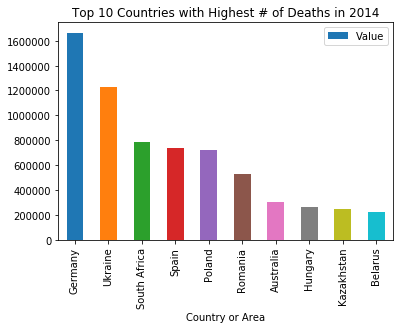

In [240]:
# Analysis of Countries with the top # of deaths
print("Analysis of countries with the top # of deaths")

# Grouping by Country or Area to get total deaths per country with descending sort
df = df.groupby("Country or Area").Value.sum().reset_index().sort_values("Value", ascending=False)

# Here is a bar graph of the Countries with the top 10 # deaths. We set the label names and title of the graph
df = df.head(10)
df.plot.bar(x="Country or Area", y='Value')
plt.title('Top 10 Countries with Highest # of Deaths in 2014' )
plt.show()

Analysis of top causes of deaths


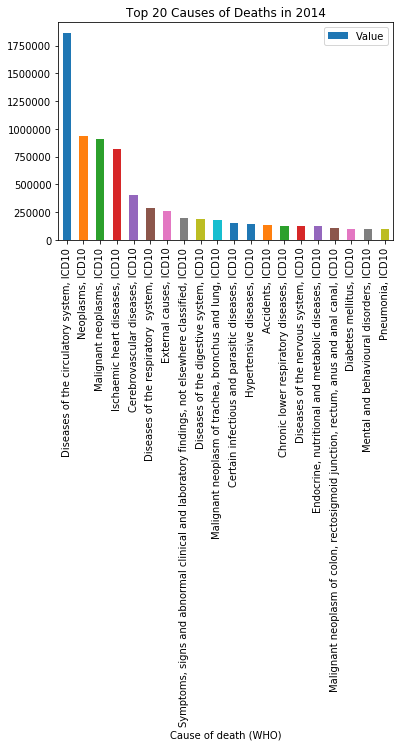

In [234]:
# Analysis of top 20 causes of Deaths
print("Analysis of top causes of deaths")
# Grouping by Cause of Death and descending sort on the sum of Value column
df = df.groupby("Cause of death (WHO)").Value.sum().reset_index().sort_values("Value", ascending=False)

# Here is a bar graph of the the top 20 cause of deaths. We set the label names and title of the graph
df = df.head(20)
df
df.plot.bar(x="Cause of death (WHO)", y='Value')
plt.title('Top 20 Causes of Deaths in 2014' )
plt.show()

Analysis of infant mortality by sex


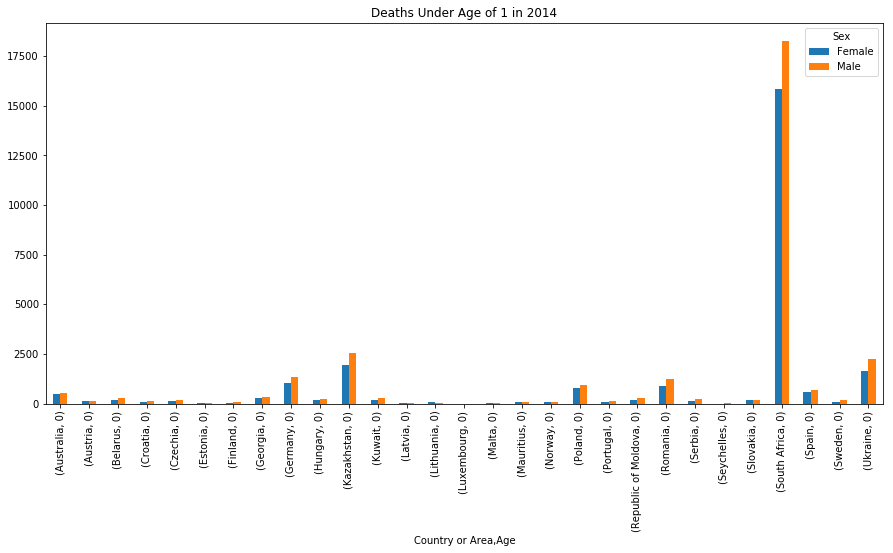

In [243]:
# Analysis of infant mortality (ages under 1 year old)
print("Analysis of infant mortality by sex")


# Grouping by Cause of Death
#df = df.groupby(["Cause of death (WHO)",'Sex']).Value.sum()
#.reset_index().sort_values("Value", ascending=False)
#df
# Here we just want to show a bar graph of the Countries with the top 10 # deaths. We set the label names and title of the graph
df = df.loc[df.Age.str.match("0", na=False)]
df

fig, ax = plt.subplots(figsize=(15,7))
plt.title('Deaths Under Age of 1 in 2014' )
# use unstack()
df.groupby(["Country or Area",'Age','Sex']).Value.sum().unstack().plot.bar(ax=ax)

